<a href="https://colab.research.google.com/github/kolasyam/NLP_mini_project_1/blob/main/NLP_mini_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dependency

In [29]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Ecommerce_data.csv")
print(df.shape)
df.head(5)

In [ ]:
#check the distribution of labels
df['label'].value_counts()

From the above, we can see that almost all the labels(classes) occured equal number of times and perfectly balanced. There is no problem of class imbalance and hence no need to apply any balancing techniques like undersampling, oversampling etc.

In [ ]:
#Add the new column which gives a unique number to each of these labels

df['label_num'] = df['label'].map({
    'Household' : 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

#checking the results
df.head(5)

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


Train test split
* Build a model with original text (no pre processing)




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (19200,)
Shape of X_test:  (4800,)


In [ ]:
X_train.head()

,Text
15820,IRIS Furniture Children Deluxe Spiderman Toddl...
23224,Godox CB-09 Hard Carrying Storage Suitcase Car...
4638,Ugreen All in 1 USB 3.0 Card Reader USB Memory...
15245,Spread Spain Metallic Gold Bar Trolley/Kitchen...
5378,Chromozome Men's Calf Socks (Pack of 3) (SX-3 ...


In [ ]:
y_train.value_counts()

,count
label_num,
0,4800
2,4800
3,4800
1,4800


In [ ]:
y_test.value_counts()

,count
label_num,
0,1200
2,1200
3,1200
1,1200


Attempt 1 :

1. using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

* use TF-IDF for pre-processing the text.

* use **KNN** as the classifier

* print the classification report.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('KNN', KNeighborsClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

In [ ]:
X_test[:5]

,Text
20706,Lal Haveli Designer Handmade Patchwork Decorat...
19166,GOTOTOP Classical Retro Cotton & PU Leather Ne...
15209,FabSeasons Camouflage Polyester Multi Function...
2462,Indian Superfoods: Change the Way You Eat Revi...
6621,"Milton Marvel Insulated Steel Casseroles, Juni..."


In [ ]:
y_test[:5]

,label_num
20706,0
19166,2
15209,3
2462,1
6621,3


In [ ]:
y_pred[:5]

array([0, 2, 3, 1, 0])

# Attempt 2 :

* using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

* use TF-IDF for pre-processing the text.

* use **MultinomialNB** as the classifier.

* print the classification report.

In [ ]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

**Attempt 3 :**

* using sklearn pipeline module create a classification pipeline to classify the Ecommerce Data.

**Note:**

* use TF-IDF for pre-processing the text.

* use **Random Forest** as the classifier.

* print the classification report.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [27]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)

    return " ".join(filtered_tokens)

In [24]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner Low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,IO Crest SY PCI40010 PCI RAID Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,Indira Designer woman Art Mysore Silk Saree Bl...


In [25]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [26]:
df.preprocessed_txt[0]

'Urban Ladder Eisner Low Study Office Computer Chair(Black study simple Eisner study chair firm foam cushion make long hour desk comfortable flexible mesh design air circulation support lean curved arm provide ergonomic forearm support adjust height gas lift find comfortable position nylon castor easy space chrome leg refer image dimension detail assembly require UL team time delivery indoor use'

Build a model with pre processed text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

Let's check the scores with our best model till now

* Random Forest

In [28]:
#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter
     ('Random Forest', RandomForestClassifier())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.97      0.97      1200
           3       0.98      0.99      0.99      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



If you compare above classification report with respect to RandomForest Model with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text. The F1 score improved in the case of preprocessed data. Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model.

**Plot confusion matrix**

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1154,   14,   17,   15],
       [  19, 1173,    5,    3],
       [  26,    8, 1163,    3],
       [   8,    6,    1, 1185]])

Text(95.72222222222221, 0.5, 'Truth')

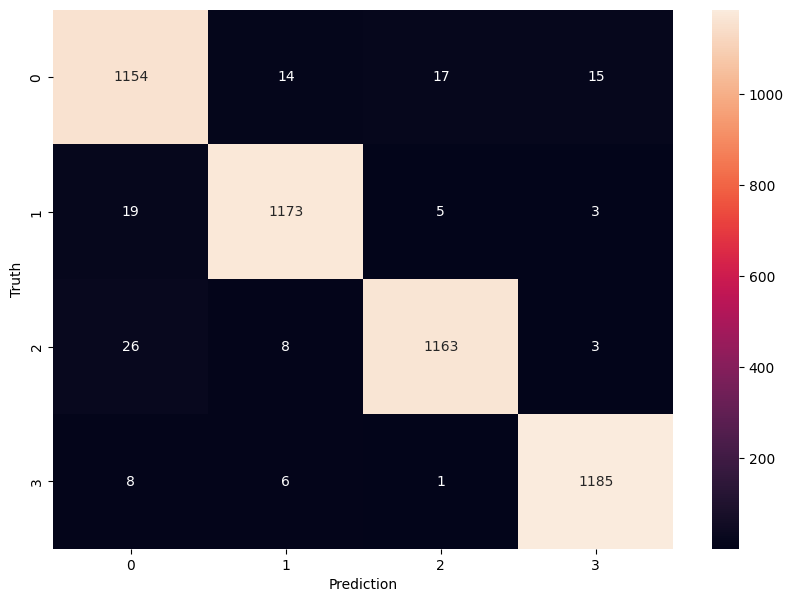

In [31]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

In [33]:
new_text = "The new smartphone has a stunning display, a powerful processor, and an excellent camera for capturing high-quality photos and videos. It also features a long-lasting battery life."
print(new_text)

The new smartphone has a stunning display, a powerful processor, and an excellent camera for capturing high-quality photos and videos. It also features a long-lasting battery life.


In [34]:
preprocessed_new_text = preprocess(new_text)
print(preprocessed_new_text)

new smartphone stunning display powerful processor excellent camera capture high quality photo video feature long last battery life


In [35]:
predicted_label_num = clf.predict([preprocessed_new_text])
print(f"Predicted label number: {predicted_label_num[0]}")

Predicted label number: 2
